In [25]:
from fastai.vision.all import *

In [26]:
path = Path(r"C:\Users\MONSTER\Desktop\corn\data")

In [27]:
corn = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=45),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2)
)

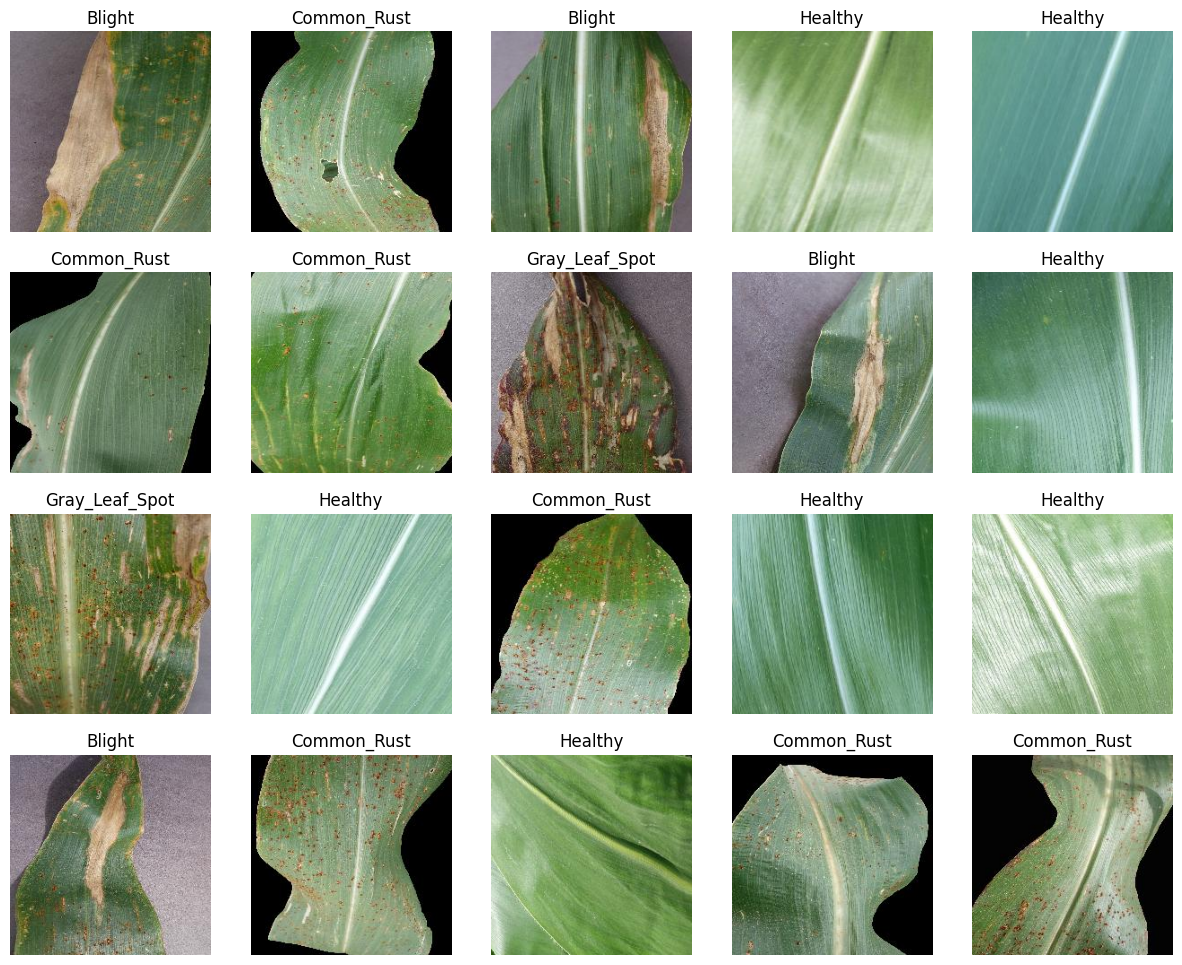

In [28]:
dls = corn.dataloaders(path)
dls.valid.show_batch(max_n=20, nrows=4)

In [29]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.780605,0.307445,0.095579,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.360561,0.196579,0.066906,00:32
1,0.287333,0.149401,0.057348,00:33
2,0.228250,0.120667,0.039427,00:30
3,0.181999,0.115996,0.038232,00:30


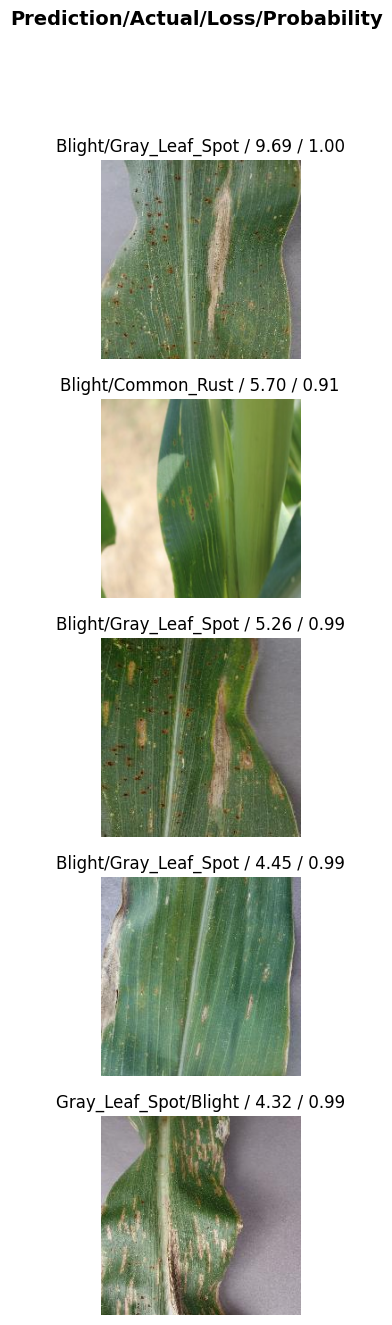

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=5)

In [31]:
learn.export()

In [32]:
from ipywidgets import FileUpload
from IPython.display import display

learn = load_learner('export.pkl')

uploader = FileUpload(accept='.jpg,.png,.jpeg', multiple=True)

display(uploader)

def on_upload_change(change):
    for uploaded_file in uploader.value:
        img = PILImage.create(uploaded_file['content'].tobytes())
        
        pred_class, pred_idx, probs = learn.predict(img)
        
        display(img.to_thumb(224))
        print(f"Predicted class: {pred_class}")
        print(f"Prediction probabilities: {probs}")

uploader.observe(on_upload_change, names='value')


FileUpload(value=(), accept='.jpg,.png,.jpeg', description='Upload', multiple=True)